In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import inline as inline

%matplotlib inline


pd.set_option('display.width', 400)
pd.set_option('display.max_columns', 23)
pd.set_option('display.max_rows', 100)

pd.options.mode.chained_assignment = None

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

df = pd.read_csv('events.csv')


c:\python\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
df

,timestamp,event,person,url,sku,model,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,criteo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694,iPhone 5s,Bom,32GB,Cinza espacial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694,iPhone 5s,Bom,32GB,Cinza espacial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2018-05-29 13:29:26,visited site,0006a21a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Smartphone,360x640,Android 5.1.1,Android 5.1
6,2018-05-29 13:29:27,ad campaign hit,0006a21a,/comprar/samsung/galaxy-s8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,criteo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2018-05-29 13:29:35,checkout,0006a21a,NaN,15338,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2018-04-09 20:12:31,generic listing,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,"10310,13333,13347,9902,9944,12774,12801,12744,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2018-04-09 20:12:31,visited site,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Computer,1920x1080,Windows 10,Chrome 65.0


In [50]:
df_model = df[df.model.notnull()][['person', 'model']]
model_persons = df_model['person']                #  SERIE CON PERSONAS QEUE ESTA
df_model_users = df.loc[df['person'].isin(model_persons), :]
df_model_users_buys = df_model_users.loc[df['event'] == 'conversion']
models_counts = df_model_users_buys['model'].value_counts()
models_counts

Samsung Galaxy J5                      88
iPhone 5s                              84
iPhone 6                               71
Samsung Galaxy S6 Flat                 39
iPhone 6S                              37
iPhone 5c                              33
Motorola Moto G4 Plus                  30
Motorola Moto G3 4G                    30
Samsung Galaxy J7                      28
Samsung Galaxy A5                      27
Samsung Galaxy Gran Prime Duos TV      24
Samsung Galaxy J7 Prime                20
Samsung Galaxy Note 4                  19
Samsung Galaxy S5                      18
Samsung Galaxy Gran Prime 3G Duos      18
Samsung Galaxy S7                      18
iPhone 5                               17
Samsung Galaxy S3 Mini                 17
Motorola Moto G2 3G Dual               17
iPhone SE                              17
Samsung Galaxy S7 Edge                 17
iPhone 7                               16
Samsung Galaxy S5 Mini Duos            16
Samsung Galaxy S6 Edge            

In [63]:
sales_Samsung = sum(df_model_users_buys['model'].loc[df_model_users_buys['model'].str.contains('Samsung')].value_counts())
sales_iPhone = sum(df_model_users_buys['model'].loc[df_model_users_buys['model'].str.contains('iPhone')].value_counts())
sales_Motorola = sum(df_model_users_buys['model'].loc[df_model_users_buys['model'].str.contains('Motorola')].value_counts())
sales_LG = sum(df_model_users_buys['model'].loc[df_model_users_buys['model'].str.contains('LG')].value_counts())
sales_Sony = sum(df_model_users_buys['model'].loc[df_model_users_buys['model'].str.contains('Sony')].value_counts())
sales_Asus = sum(df_model_users_buys['model'].loc[df_model_users_buys['model'].str.contains('Asus')].value_counts())
sales_Lenovo = sum(df_model_users_buys['model'].loc[df_model_users_buys['model'].str.contains('Lenovo')].value_counts())

df_brand_sales = pd.DataFrame({'brand': ['Samsung', 'iPhone', 'Motorola', 'LG', 'Sony', 'Asus', 'Lenovo'],
                   'sales': [sales_Samsung, sales_iPhone, sales_Motorola, sales_LG, sales_Sony, sales_Asus, sales_Lenovo]})
df_brand_sales

,brand,sales
0,Samsung,641
1,iPhone,323
2,Motorola,149
3,LG,20
4,Sony,23
5,Asus,2
6,Lenovo,14


Text(0, 0.5, 'Frequency')

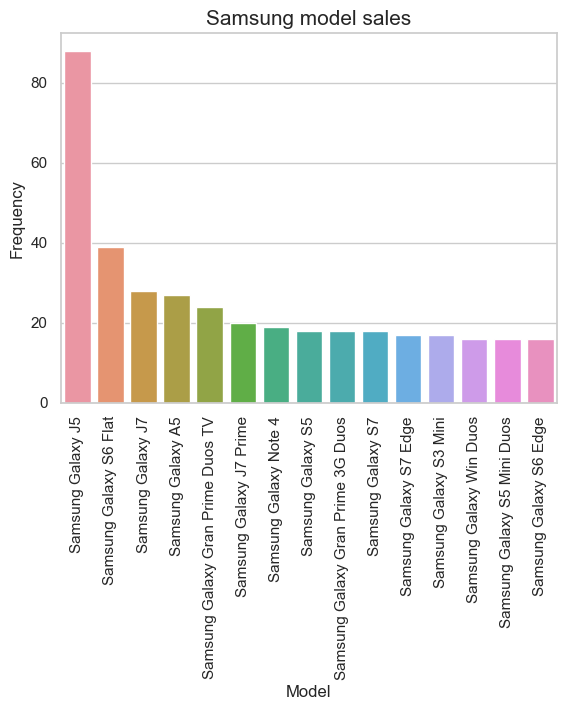

In [67]:
sales_Samsung = df_model_users_buys['model'].loc[df_model_users_buys['model'].str.contains('Samsung')].value_counts().head(15)

g2 = sns.barplot(x=sales_Samsung.index, y=sales_Samsung.values, orient = 'v')
plt.xticks(rotation=90)
g2.set_title("Samsung model sales", fontsize = 15)
g2.set_xlabel("Model", fontsize = 12)
g2.set_ylabel("Frequency", fontsize = 12)

Text(0, 0.5, 'Frequency')

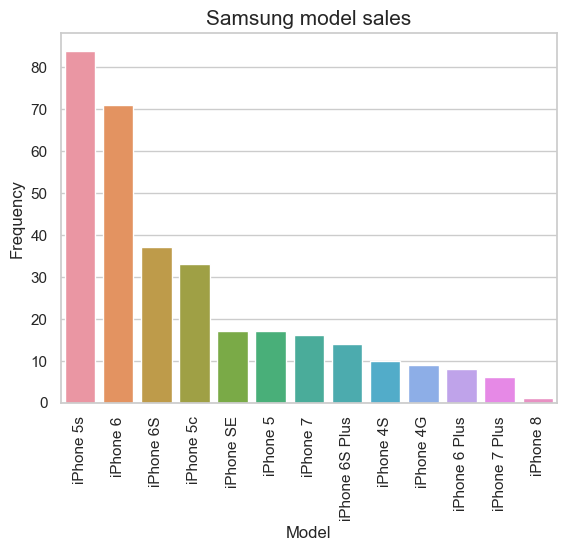

In [68]:
sales_iPhone = df_model_users_buys['model'].loc[df_model_users_buys['model'].str.contains('iPhone')].value_counts().head(15)

g2 = sns.barplot(x=sales_iPhone.index, y=sales_iPhone.values, orient = 'v')
plt.xticks(rotation=90)
g2.set_title("Samsung model sales", fontsize = 15)
g2.set_xlabel("Model", fontsize = 12)
g2.set_ylabel("Frequency", fontsize = 12)

In [72]:
df_releaseYear_model = pd.DataFrame({'model': ['Samsung Galaxy J5', 'iPhone 5s', 'Motorola'],
                   'releaseYear': [2017, 2013, 2016]})
df_releaseYear_model

,model,releaseYear
0,Samsung Galaxy J5,2017
1,iPhone 5s,2013
2,Motorola,2016


Text(0, 0.5, 'Frequency')

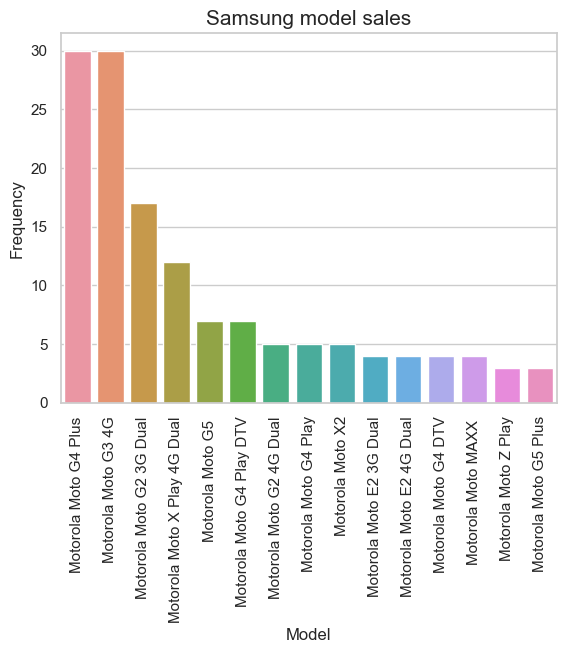

In [71]:
sales_Motorola = df_model_users_buys['model'].loc[df_model_users_buys['model'].str.contains('Motorola')].value_counts().head(15)

g2 = sns.barplot(x=sales_Motorola.index, y=sales_Motorola.values, orient = 'v')
plt.xticks(rotation=90)
g2.set_title("Samsung model sales", fontsize = 15)
g2.set_xlabel("Model", fontsize = 12)
g2.set_ylabel("Frequency", fontsize = 12)